In [1]:
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

import utils
from modules import RotationLSH, IdentityLSH, PcaLSH, RandomForestClustRegressor, PictureResolver

In [22]:
model_name = './trained_models/example_model.pkl'

with open(model_name, 'rb') as inp:
    model = pickle.load(inp)

config = model['config']
scaler = model['scaler']
lsh = model['lsh']
rf = model['rf']

s = config['s']
augmented = config['augmented']

pr = PictureResolver(rf, lsh, scaler)

In [23]:
config

{'data_dir': '../data/Set14',
 'train_files': ['barbara.png',
  'bridge.png',
  'comic.png',
  'pepper.png',
  'man.png'],
 'n_samples': 10000,
 's': 0.5,
 'n_estimators': 10,
 'max_depth': 15,
 'max_features': 20,
 'augmented': True,
 'lsh_type': 'rotation',
 'n_components': 50,
 'binary': False,
 'reg_type': 'lasso',
 'min_samples_leaf': 64,
 'alpha': 4}

In [24]:
path_test = '../data/Set14/comic.png'
img_test = utils.load_image(path_test)

img_test = utils.load_image(path_test)
img_test = utils.crop_image(img_test, s)
x = utils.resize(utils.resize(img_test, s), 1/s)

y = pr.resolve(x, augmented=augmented)
images, y = utils.crop_by_nan([img_test, x], y)
img_test, x = images

Text(0.5, 0, 'Difference')

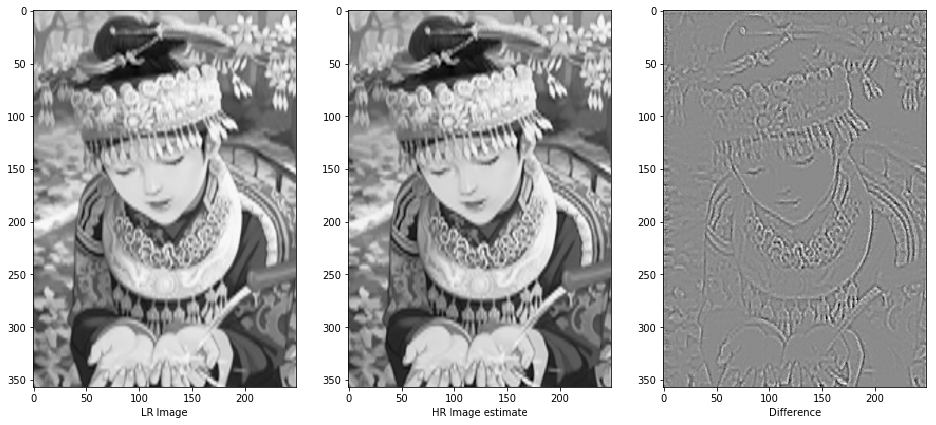

In [25]:
fig, ax = plt.subplots(1,3, figsize=(16,7))
ax[0].imshow(x, cmap='Greys_r')
ax[1].imshow(y, cmap='Greys_r')
ax[2].imshow(y-x, cmap='Greys_r')

ax[0].set_xlabel('LR Image')
ax[1].set_xlabel('HR Image estimate')
ax[2].set_xlabel('Difference')

Text(0.5, 0, 'Difference')

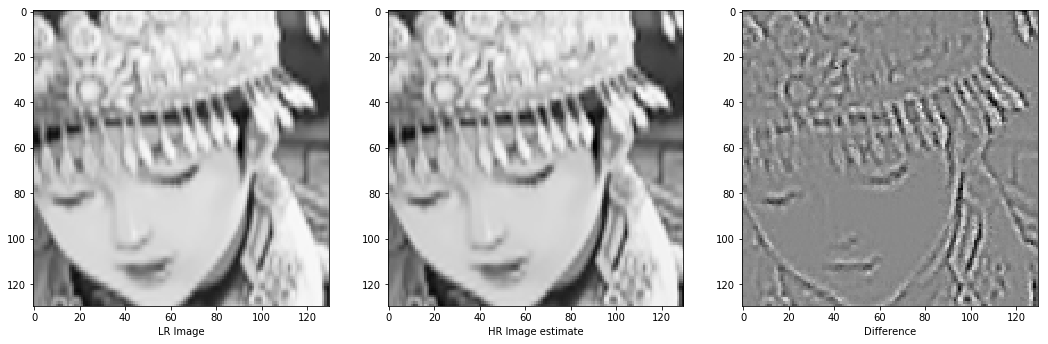

In [26]:
x_slice = slice(70,200)
y_slice = slice(70,200)

fig, ax = plt.subplots(1,3, figsize=(18,7))
ax[0].imshow(x[x_slice,y_slice], cmap='Greys_r')
ax[1].imshow(y[x_slice,y_slice], cmap='Greys_r')
ax[2].imshow((y-x)[x_slice,y_slice], cmap='Greys_r')

ax[0].set_xlabel('LR Image')
ax[1].set_xlabel('HR Image estimate')
ax[2].set_xlabel('Difference')